In [1]:
import pandas as pd
import numpy as np
import sqlite3


In [11]:
orders = pd.read_csv(r"C:\Users\james\Desktop\Food_Delivery_Hackathon\data\final_food_delivery_dataset.csv")
orders.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [13]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   restaurant_id      10000 non-null  int64  
 3   order_date         10000 non-null  object 
 4   total_amount       10000 non-null  float64
 5   restaurant_name_x  10000 non-null  object 
 6   name               10000 non-null  object 
 7   city               10000 non-null  object 
 8   membership         10000 non-null  object 
 9   restaurant_name_y  10000 non-null  object 
 10  cuisine            10000 non-null  object 
 11  rating             10000 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 937.6+ KB


In [23]:
users = pd.read_json(r"C:\Users\james\Downloads\users.json")
users.head()


,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [25]:
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     3000 non-null   int64 
 1   name        3000 non-null   object
 2   city        3000 non-null   object
 3   membership  3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


In [27]:
conn = sqlite3.connect(":memory:")


In [33]:
with open(r"C:\Users\james\Downloads\restaurants.sql", "r") as file:
    sql_script = file.read()

conn.executescript(sql_script)


In [35]:
restaurants = pd.read_sql("SELECT * FROM restaurants", conn)
restaurants.head()


,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [37]:
df = orders.merge(users, on="user_id", how="left")


In [39]:
final_df = df.merge(restaurants, on="restaurant_id", how="left")


In [41]:
final_df.head()
final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   restaurant_id      10000 non-null  int64  
 3   order_date         10000 non-null  object 
 4   total_amount       10000 non-null  float64
 5   restaurant_name_x  10000 non-null  object 
 6   name_x             10000 non-null  object 
 7   city_x             10000 non-null  object 
 8   membership_x       10000 non-null  object 
 9   restaurant_name_y  10000 non-null  object 
 10  cuisine_x          10000 non-null  object 
 11  rating_x           10000 non-null  float64
 12  name_y             10000 non-null  object 
 13  city_y             10000 non-null  object 
 14  membership_y       10000 non-null  object 
 15  restaurant_name    10000 non-null  object 
 16  cuisine_y          1000

In [43]:
final_df.to_csv("final_food_delivery_dataset.csv", index=False)


In [57]:
final_df_clean = final_df[[
    "order_id",
    "user_id",
    "restaurant_id",
    "order_date",
    "total_amount",
    "name_x",          # user name
    "city_x",          # user city
    "membership_x",    # user membership
    "restaurant_name", # restaurant name
    "cuisine_y",       # cuisine
    "rating_y"         # rating
]]


In [59]:
final_df_clean.columns = [
    "order_id",
    "user_id",
    "restaurant_id",
    "order_date",
    "total_amount",
    "user_name",
    "city",
    "membership",
    "restaurant_name",
    "cuisine",
    "rating"
]


In [61]:
final_df_clean.info()
final_df_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         10000 non-null  int64  
 1   user_id          10000 non-null  int64  
 2   restaurant_id    10000 non-null  int64  
 3   order_date       10000 non-null  object 
 4   total_amount     10000 non-null  float64
 5   user_name        10000 non-null  object 
 6   city             10000 non-null  object 
 7   membership       10000 non-null  object 
 8   restaurant_name  10000 non-null  object 
 9   cuisine          10000 non-null  object 
 10  rating           10000 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 859.5+ KB


,order_id,user_id,restaurant_id,order_date,total_amount,user_name,city,membership,restaurant_name,cuisine,rating
0,1,2508,450,18-02-2023,842.97,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


<font size=7 >Visualizations </font>

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
sns.set_style("whitegrid")


<font size=7>City-wise Total Revenue </font>

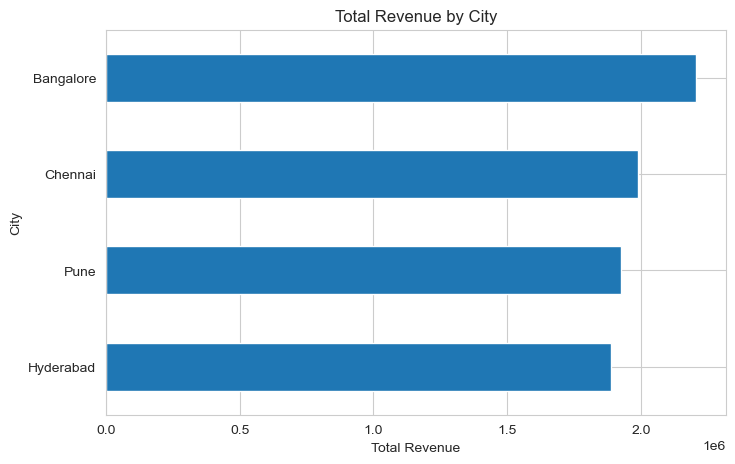

In [67]:
city_revenue = final_df_clean.groupby("city")["total_amount"].sum().sort_values()

plt.figure(figsize=(8,5))
city_revenue.plot(kind="barh")
plt.title("Total Revenue by City")
plt.xlabel("Total Revenue")
plt.ylabel("City")
plt.show()


<font size=7>Cuisine-wise Average Order Value</font>

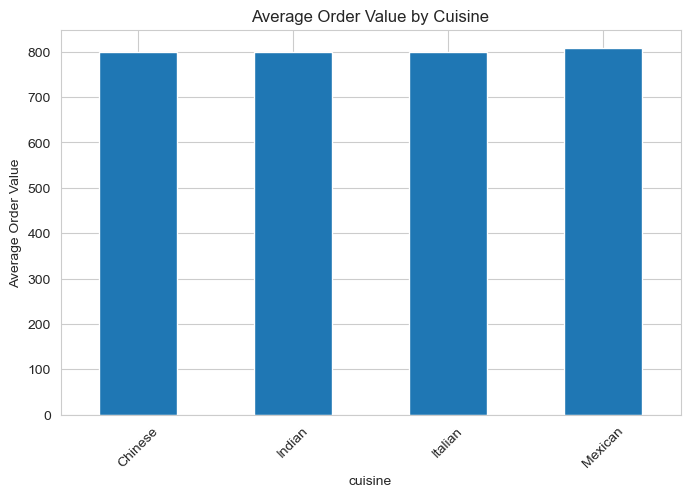

In [69]:
cuisine_avg = final_df_clean.groupby("cuisine")["total_amount"].mean().sort_values()

plt.figure(figsize=(8,5))
cuisine_avg.plot(kind="bar")
plt.title("Average Order Value by Cuisine")
plt.ylabel("Average Order Value")
plt.xticks(rotation=45)
plt.show()


In [119]:
cuisine_avg
cuisine_avg.idxmax()


'Mexican'

<font size=7> Gold vs Regular Orders</font>

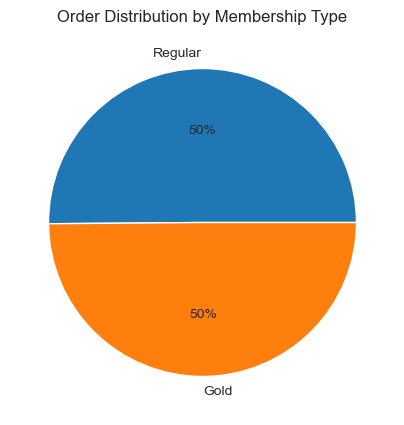

In [71]:
membership_counts = final_df_clean["membership"].value_counts()

plt.figure(figsize=(5,5))
membership_counts.plot(kind="pie", autopct="%1.0f%%")
plt.title("Order Distribution by Membership Type")
plt.ylabel("")
plt.show()


<font size=7>Rating Range vs Revenue</font>

In [73]:
bins = [3.0, 3.5, 4.0, 4.5, 5.0]
labels = ["3.0–3.5", "3.6–4.0", "4.1–4.5", "4.6–5.0"]

final_df_clean["rating_range"] = pd.cut(
    final_df_clean["rating"],
    bins=bins,
    labels=labels,
    include_lowest=True
)


C:\Users\james\AppData\Local\Temp\ipykernel_17220\836048216.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_clean["rating_range"] = pd.cut(


C:\Users\james\AppData\Local\Temp\ipykernel_17220\2164719085.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_revenue = final_df_clean.groupby("rating_range")["total_amount"].sum()


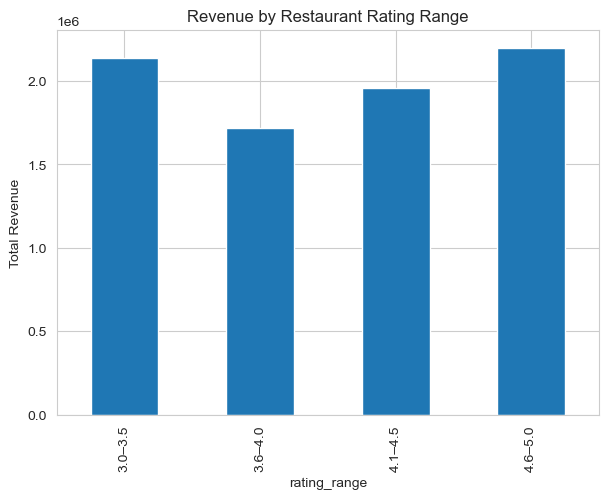

In [75]:
rating_revenue = final_df_clean.groupby("rating_range")["total_amount"].sum()

plt.figure(figsize=(7,5))
rating_revenue.plot(kind="bar")
plt.title("Revenue by Restaurant Rating Range")
plt.ylabel("Total Revenue")
plt.show()


<font size =7> Quarter-wise Revenue </font>

C:\Users\james\AppData\Local\Temp\ipykernel_17220\2072251324.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final_df_clean["order_date"] = pd.to_datetime(final_df_clean["order_date"])
C:\Users\james\AppData\Local\Temp\ipykernel_17220\2072251324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_clean["order_date"] = pd.to_datetime(final_df_clean["order_date"])
C:\Users\james\AppData\Local\Temp\ipykernel_17220\2072251324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

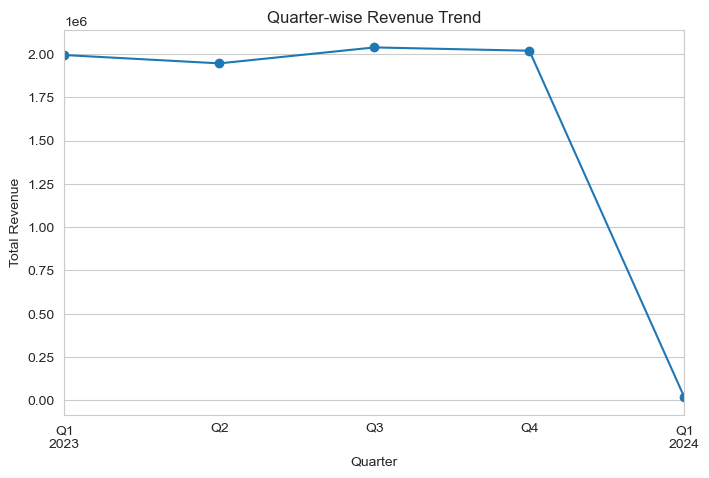

In [77]:
final_df_clean["order_date"] = pd.to_datetime(final_df_clean["order_date"])
final_df_clean["quarter"] = final_df_clean["order_date"].dt.to_period("Q")

quarter_revenue = final_df_clean.groupby("quarter")["total_amount"].sum()

plt.figure(figsize=(8,5))
quarter_revenue.plot(kind="line", marker="o")
plt.title("Quarter-wise Revenue Trend")
plt.ylabel("Total Revenue")
plt.xlabel("Quarter")
plt.show()


<font size=7>Restaurant with High AOV but < 20 Orders </font>

In [143]:
restaurant_stats = final_df_clean.groupby("restaurant_name").agg(
    total_orders=("order_id", "count"),
    avg_order_value=("total_amount", "mean")
)

restaurant_stats[
    restaurant_stats["total_orders"] < 20
].sort_values("avg_order_value", ascending=False).head()


,total_orders,avg_order_value
restaurant_name,,
Restaurant_294,13,1040.222308
Restaurant_262,18,1029.473333
Restaurant_77,12,1029.180833
Restaurant_193,15,1026.306667
Restaurant_7,16,1002.140625


In [145]:
final_df_clean.to_csv("final_food_delivery_dataset.csv", index=False)


**Total orders placed by Gold members**

In [129]:
total_gold_orders = final_df_clean[final_df_clean['membership'] == 'Gold']['order_id'].count()
print("Total orders by Gold members:", total_gold_orders)

Total orders by Gold members: 4987


**Total revenue from Hyderabad**

In [131]:
total_revenue_hyderabad = round(final_df_clean[final_df_clean['city'] == 'Hyderabad']['total_amount'].sum())
print("Total revenue from Hyderabad:", total_revenue_hyderabad)

Total revenue from Hyderabad: 1889367


**Number of distinct users who placed at least one order**

In [154]:
distinct_users = final_df_clean['user_id'].nunique()
print("Distinct users who placed orders:", distinct_users)

Distinct users who placed orders: 2883


**Average order value for Gold members**

In [135]:
avg_order_gold = round(final_df_clean[final_df_clean['membership'] == 'Gold']['total_amount'].mean(), 2)
print("Average order value for Gold members:", avg_order_gold)

Average order value for Gold members: 797.15


**Orders placed for restaurants with rating >= 4.5**

In [137]:
orders_high_rating = final_df_clean[final_df_clean['rating'] >= 4.5]['order_id'].count()
print("Orders for restaurants with rating >= 4.5:", orders_high_rating)

Orders for restaurants with rating >= 4.5: 3374


**Orders placed in the top revenue city among Gold members only**

In [139]:
gold_df = final_df_clean[final_df_clean['membership'] == 'Gold']
top_gold_city = gold_df.groupby('city')['total_amount'].sum().idxmax()
orders_top_gold_city = gold_df[gold_df['city'] == top_gold_city]['order_id'].count()
print("Orders in top revenue city among Gold members:", orders_top_gold_city)


Orders in top revenue city among Gold members: 1337


##  Contact

- **Name:** James Alhat  
- **Email:** jamesalhat21@gmail.com  
- **LinkedIn:** https://www.linkedin.com/in/james-alhat-2004c
- **GitHub:** https://github.com/Jameslahat



##  About Me

I am an aspiring **Data Scientist** and an **AI/ML enthusiast** with a strong passion for building data-driven solutions and extracting meaningful insights from complex datasets.

I enjoy working on end-to-end data science workflows, including data collection, data cleaning, feature analysis, exploratory data analysis, and visualization. I am particularly interested in applying **machine learning and analytical techniques** to solve real-world business problems.

This project was developed as part of a hackathon conducted by **Innomatics Research Labs** and demonstrates my ability to:
- Work with multiple data formats (CSV, JSON, SQL)
- Apply correct data integration and join strategies
- Perform structured data analysis and visualization
- Derive actionable insights from real-world datasets

I am highly motivated, detail-oriented, and continuously learning to strengthen my skills in **Data Science, Machine Learning, and AI**. I am eager to contribute to an organization where I can apply my analytical skills, learn from industry experts, and grow as a data professional.

 **Skills:** Python, Pandas, SQL, Data Analysis, Data Visualization, Machine Learning (Basics), Jupyter Notebook  
 **Career Goal:** Data Scientist / Machine Learning Engineer
